In [53]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_pts_pyplot
import mmcv
import os
import numpy as np

In [54]:
# config_file = '../configs/serialgfl/serialgfl_r50_fpn_1x_coco_[DGQP-c64].py'
# checkpoint_file = '../work_dirs/FAQE_r50_fpn_1x/epoch_12.pth'

# config_file = '../configs/serialgfl/FAQE_r2n101_dcn_fpn_last_ms2x.py'
# checkpoint_file = '../work_dirs/FAQE_r2n101_dcn_fpn_last_ms2x/epoch_24.pth'

# config_file = '../configs/serialgfl/FAQE_r50_fpn_1x.py'
# checkpoint_file = '../work_dirs/FAQE_r50_fpn_1x/epoch_12.pth'


# checkpoint_file = '../work_dirs/serialgfl_r50_fpn_1x_coco_[DGQP-c64]/epoch_10.pth'


# config_file = '../configs/atss/atss_r50_fpn_1x_coco.py'
# checkpoint_file = '../configs/atss/atss_r50_fpn_1x_coco_20200209-985f7bd0.pth'

config_file = '../configs/reppoints/reppoints_minmax_r50_fpn_1x_coco.py'
checkpoint_file = '../configs/reppoints/reppoints_minmax_r50_fpn_1x.pth'


# config_file = '../configs/serialgfl/serialgfl_r50_fpn_wogflv2_2loss_1x_coco.py'
# checkpoint_file = '../work_dirs/serialgfl_r50_fpn_wogflv2_2loss_1x_coco/epoch_12_C3_share_417.pth'


In [55]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/models/necks/fpn.py:110: DeprecationWarning: "extra_convs_on_inputs" will be deprecated in v2.9.0,Please use "add_extra_convs"
  warnings.warn(
/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/apis/inference.py:55: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn(


In [56]:
import torch
from mmdet.datasets.builder import build_dataset, build_dataloader

# select_ind = 3952 # many oranges
# select_ind = 4069
# select_ind = 198 # a skining woman
# select_ind = 203 # a skining man

# select_ind = 252 # a flyman on motorcycle
# select_ind = 2114 # two girls

select_ind = 1523 # motorcycle and man
# select_ind = 546 # 3 zebra pefect!
# select_ind = 1202 # 2 horses, best



# select_ind = 3887 # a boy behind a hourse
# select_ind = 1456 # a skining man
# select_ind = 629
# select_ind = 3119
# select_ind = 2711 # 3 woman
# select_ind = 53 # crane
# select_ind = 1526 # long airplane
# select_ind = 2127
# select_ind = 835 # kite
# select_ind = 241 # complex background. two men on bycycle
# select_ind = 1805 # cat
# select_ind = 2721 # 2 men playing football
# select_ind = 1153 # 2 cats
# select_ind = 2049 # 2 giraffle
# select_ind = 4789 # 2 elephants
# select_ind = 174 # umbrellas
# select_ind = 2785 # airplane best!
# select_ind = 3840 # 2 zebra
# select_ind = 2550 # long long train
# select_ind = 2399 # spoon
# select_ind = 187 # dog and computer
# select_ind = 4685 # a girl on board
# select_ind = 4762 # 2 giraffle
# select_ind = 2547 # 3 giraffle
# select_ind = 3314 # cat
# select_ind = 3023 # a man on coach, complex background
# select_ind = 732 # many men, complex background
# select_ind = 125 # many men, complex background
# select_ind = 4 # bycycle best
# select_ind = 4805 # many zebras
# select_ind = 3699 # a bird
# select_ind = 623 # many motorcycles, complex background
# select_ind = 2209 # man playing baseball
# select_ind = 3264 # 2 boys playing football
# select_ind = 3436 # airplane
# select_ind = 704 # A man playing tennis, complex background
# select_ind = 4904 # flying bird
# select_ind = 4161 # motorcycle
# select_ind = 1202 # 2 horses, best
# select_ind = 2876 # A man playing tennis, best
# select_ind = 4069 # 3 elephants
# select_ind = 4552


device = next(model.parameters()).device

cfg = model.cfg
dataset = build_dataset(cfg.data.show)

item = dataset[select_ind]

item['img_metas'] = [img_metas.data for img_metas in item['img_metas']]
item['img'] = [img.data.cuda() for img in item['img']]
item['gt_bboxes'] = [gt_bboxes.data.cuda() for gt_bboxes in item['gt_bboxes']]
item['gt_labels'] = [gt_labels.data.cuda() for gt_labels in item['gt_labels']]

print(item['img_metas'][0]['filename'])
print(item['gt_bboxes'])
print(item['gt_labels'])

img = torch.stack(item['img'], dim=0)
with torch.no_grad():
    x = model.extract_feat(img)
    outs = model.bbox_head(x)
    # list[gt_nums]-list[lvl]-tensor[H,W]
    cls_score_list, conf_list, iou_list = model.bbox_head.get_results(
        *outs, item['gt_bboxes'], item['gt_labels'], item['img_metas'])[0]
    # cls_score_list, iou_list = model.bbox_head.get_results(
    #     *outs, item['gt_bboxes'], item['gt_labels'], item['img_metas'])[0]

    # print(len(conf_list))
    # print(len(conf_list[0]))
    # print(len(conf_list[1]))
    # print(len(iou_list))
    # print(len(iou_list[0]))
    # print(len(iou_list[1]))

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!
/share/Datasets/coco/val2017/000000152120.jpg
[tensor([[ 138.4283,  267.5597, 1119.9409,  788.9086],
        [ 420.6429,   47.9813,  873.6589,  585.5176]], device='cuda:0')]
[tensor([3, 0], device='cuda:0')]


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
import numpy as np

def results_2_heatmaps(results, norm=None):
    # results: list[gt_nums]-list[lvl]-tensor[H,W]
    heatmaps_list = []
    max_val_list = []
    min_val_list = []
    for gt_num in range(len(results)):
        max_val = [item.max() for item in results[gt_num]]
        min_val = [item.min() for item in results[gt_num]]
        max_val = torch.stack(max_val)
        min_val = torch.stack(min_val)
        # print('{} {}'.format(max_val, min_val))

        max_val_list.append(max_val.max())
        min_val_list.append(min_val.min())

        # acc_bbox = [item.gt(0.9).sum() for item in results[gt_num]]
        # acc_bbox = torch.stack(acc_bbox)
        # print(acc_bbox)

    max_val = torch.stack(max_val_list).max()
    min_val = torch.stack(min_val_list).min()


    for gt_num in range(len(results)):
        if norm=='fixed':
            max_val = 1.0
            min_val = 0.6
            heatmaps_lvl_list = [
                ((item-min_val)/(max_val-min_val)).clamp(min=0.0).cpu().numpy()
                 for item in results[gt_num]]
        elif norm=='dynamic':
            heatmaps_lvl_list = [
                ((item-min_val)/(max_val-min_val)).cpu().numpy()
                 for item in results[gt_num]]
        else:
            heatmaps_lvl_list = [
            item.cpu().numpy() for item in results[gt_num]]
        heatmaps_list.append(heatmaps_lvl_list)

    return heatmaps_list

In [ ]:
# list[gt_nums]-list[lvl]-tensor[H,W]
cls_score_heatmap_list = results_2_heatmaps(cls_score_list, norm='none')
conf_heatmap_list = results_2_heatmaps(conf_list, norm='none')
iou_heatmap_list = results_2_heatmaps(iou_list, norm='none')

In [ ]:
import cv2

def draw_feature_map(img_path, heatmap_list, save_dir, heatmap_perfix=''):
    img = mmcv.imread(img_path)
    for gt_i, heatmap_gt in enumerate(heatmap_list):
        for lvl_i, heatmap in enumerate(heatmap_gt):
            heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
            heatmap = np.uint8(255 * heatmap)
            heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
            superimposed_img = heatmap * 0.5 + img*0.3
            cv2.imwrite(os.path.join(save_dir,heatmap_perfix+'_heatmap_'+str(gt_i)+'_'+str(lvl_i)+'.png'), superimposed_img)


In [ ]:
img_path = item['img_metas'][0]['filename']
draw_feature_map(img_path, cls_score_heatmap_list, './heatmaps', 'cls_score')
draw_feature_map(img_path, conf_heatmap_list, './heatmaps', 'conf')
draw_feature_map(img_path, iou_heatmap_list, './heatmaps', 'iou')


In [57]:
# test a single image
# img = '/share/Datasets/coco/val2017/'+ '000000009448.jpg'
#os.listdir('/share/Datasets/coco/val2017/')[10]
# img = './000000190756.jpg'
img = item['img_metas'][0]['filename']
result = inference_detector(model, img, rescale=True)
# result = inference_detector(model, img, rescale=False)


/share/BACKUP/kit/mmdetection-v2.8.0/mmdet/datasets/utils.py:56: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/share/BACKUP/kit/mmcv/mmcv/utils/misc.py:303: UserWarning: "iou_thr" is deprecated in `nms`, please use "iou_threshold" instead
  warnings.warn(


176
[array([246.22371  ,  28.601559 , 471.78687  , 324.4369   ,   0.7927599,
       341.618    , 204.95999  , 463.90854  ,  43.527435 , 238.78642  ,
       142.76128  , 381.20322  , 345.78827  , 357.96146  , 257.20343  ,
       331.7978   ,  97.423164 , 342.76138  ,  56.383533 , 369.86798  ,
       167.25067  , 416.62833  , 186.22685  , 324.7896   , 200.86882  ,
       471.78687  ,  28.603067 , 246.22371  , 135.85887  , 451.7771   ,
       312.24072  , 274.01196  , 324.454    , 331.28204  ,  98.09949  ,
       342.5522   ,  56.444126 , 368.9663   , 165.97601  , 416.99805  ,
       185.97176  , 324.64777  , 201.07184  ], dtype=float32), array([244.3208    ,  27.43297   , 467.4992    , 328.1413    ,
         0.72027105, 307.4562    , 170.8       , 418.88834   ,
        33.823597  , 219.67949   , 145.7152    , 371.01242   ,
       308.79733   , 333.61176   , 224.41197   , 334.8493    ,
       108.23159   , 325.8829    ,  74.59105   , 345.39954   ,
       148.20734   , 392.27527   , 180.71

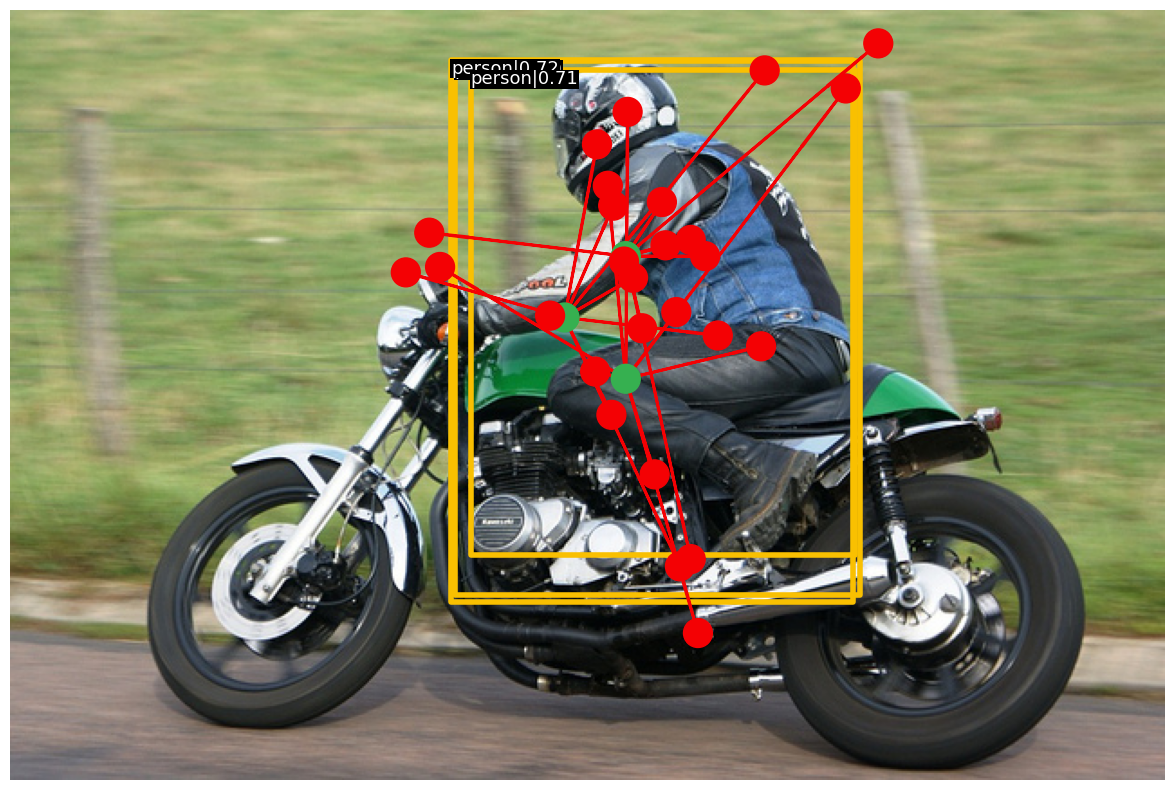

In [63]:
selected_index = item['gt_labels'][0][1].item()
# selected_index_1 = item['gt_labels'][0][1].item()
# selected_index = 0
# bbox_num = 2
start = 0
num = 1

select = range(3, 6)
# select = [15, 16, 21]
# select = [30, 32, 33]

# select = [21]


# select = [9]
# select = [12]



# select = [0, 1, 2, 4, 5, 6, 10, 12, 13]
# select = [0, 1, 2]
# select = [4, 5, 6]
# select = [10, 12, 13]

# select = [0, 1, 2]
# select = [6, 7, 8]

# select = [0, 1, 2]
# select = [6, 7, 9]
# select = [11, 12, 13, 14, 15]

# select = [10, 12, 13]



# select_0 = [0, 1, 2, 6, 7, 8]
# select_1 = [0, 1, 2]

# select_0 = [0, 1, 2]
# select_1 = [0, 1, 2]


# result_selected = result

result_selected = []
for i in range(len(result)):
    if i==selected_index:
        print(len(result[i]))
        # result[i] = result[i][0:bbox_num, :]
        # result_selected.append(result[i][start:start+num, :])
        for j in select:
            result_selected.append(result[i][j, :])
    # elif i==selected_index_1:
    #     for j in select_1:
    #         result_selected.append(result[i][j, :])
    else:
        # result[i] = np.zeros([0, result[i].shape[1]])
        result_selected.append(np.zeros([0, result[i].shape[1]]))

print(result_selected)


# show the results
# show_result_pyplot(model, img, result_selected, score_thr=0.0)
# show_pts_pyplot(model, img, result_selected, score_thr=0.3, items=['bbox', 'center', 'pts_init', 'pts_refine', 'arrow'])
# show_pts_pyplot(model, img, result_selected, score_thr=0.0, items=['bbox', 'center', 'pts_init', 'arrow'])
# show_pts_pyplot(model, img, result_selected, score_thr=0.0, items=['center', 'pts_init', 'arrow'])
# show_pts_pyplot(model, img, result_selected, score_thr=0.3, items=['bbox', 'pts_init'])
# show_pts_pyplot(model, img, result_selected, score_thr=0.3, items=['bbox'])

# show_pts_pyplot(model, img, result_selected, score_thr=0.0,
#                 result_form=dict(box=5, center=1, pts_i=9),
#                 result_show=dict(box=True, center=True, pts_i=True, pts_r=False, arrow=True))

show_pts_pyplot(model, img, result_selected, score_thr=0.0,
                result_form=dict(box=5, center=1, pts_i=9, pts_r=9),
                result_show=dict(box=True, center=True, pts_i=True, pts_r=False, arrow=True))

# show_pts_pyplot(model, img, result_selected, score_thr=0.0,
#                 result_form=dict(box=5),
#                 result_show=dict(box=True, center=False, pts_i=False, pts_r=False, arrow=False))


